In [3]:
%matplotlib notebook
# General libraries
import numpy as np                # to deal with arrays, vectors, matrices...
import matplotlib.pyplot as plt   # to plot the data

# Tensorflow
import os
HOME = os.getenv('HOME')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # to get rid of the TF compilation warnings
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5,3
mpl.rcParams['font.size'] = 12.0

## Get/Prepare the data
Let us create a training and testing datasets.  
The data is created randomly so the testing and training datasets do not intersect  
The data will be normalized to the [0,1] interval

<IPython.core.display.Javascript object>


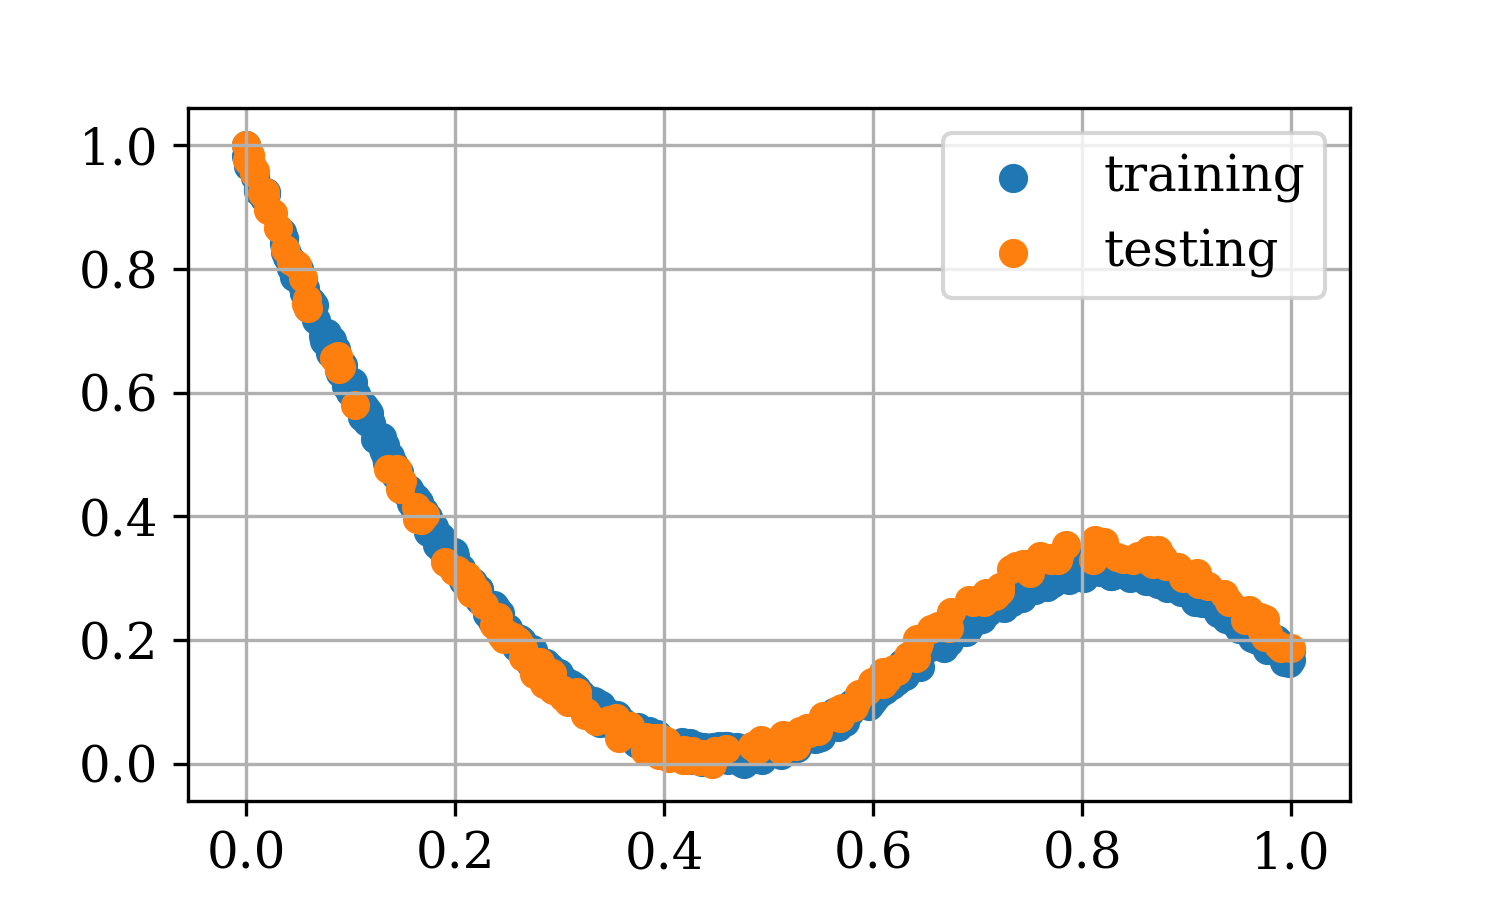

In [5]:
import data  # hand-made library with a couple of functions
# Create the data
IN_train, OUT_train = data.gen_data_cool(300, norm=True)
IN_test,  OUT_test  = data.gen_data_cool(100, norm=True)

# Visualize the data
fig, ax = plt.subplots()
ax.scatter(IN_train, OUT_train, label='training')
ax.scatter(IN_test, OUT_test, label='testing')
ax.legend()
plt.show()

## Build the model
Let us create a model with two hidden layers formed by 2 and 5 sigmoid neurons respectively. It would look something like this:

<img src="test.svg" />

The output of the NN can be calculated as follows:
$$\text{Output} = \vec{a}_3 = \sigma\left( W_3\cdot\vec{a}_2 +b_3 \right)$$
where $\vec{a}_2$ is the output (activation) of the second hidden layer:
$$\vec{a}_2 = \sigma\left( W_2\cdot\vec{a}_1 +\vec{b}_2 \right)$$
where $\vec{a}_1$ is the output of the first hidden layer:
$$\vec{a}_1 = \sigma\left( W_1\cdot\vec{v}_{\text{input}} +\vec{b}_1 \right)$$

The NN, then, will be defined by three weight matrices ($W_1$, $W_2$ and $W_2$ in the figure) and three biases arrays (one for each layer) with shapes:
$$W_1\rightarrow(1,2) \qquad W_2\rightarrow(2,5) \qquad W_3\rightarrow(5,1)$$
$$\vec{b}_1\rightarrow(1,2) \qquad \vec{b}_2\rightarrow(1,5) \qquad \vec{b}_3\rightarrow(1,1)$$

In [6]:
model = models.Sequential()
# # Option 1
# model.add( Dense(2, activation=None, input_shape=(1,)) )
# model.add( Dense(5, activation=tf.nn.sigmoid) )
# model.add( Dense(1, activation=None) )

# Option 2
model.add( Dense(3, activation=None, input_shape=(1,)) )
model.add( Dense(10, activation='tanh') )
model.add( Dense(10, activation='tanh') )
model.add( Dense(1, activation=None) )


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['accuracy'])

## Training

In [11]:
# Training
from time import time
told = time()
history = model.fit(IN_train, OUT_train, epochs=200,
                    validation_data = (IN_test,OUT_test),
                    verbose=1)
print(f'\nTraining done in: {time()-told:.3f}s')

Train on 600 samples, validate on 200 samples
Epoch 1/200
600/600 [==============================] - 0s 136us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0023 - val_accuracy: 0.0100
Epoch 2/200
600/600 [==============================] - 0s 239us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0022 - val_accuracy: 0.0100
Epoch 3/200
600/600 [==============================] - 0s 184us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0022 - val_accuracy: 0.0100
Epoch 4/200
600/600 [==============================] - 0s 216us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0024 - val_accuracy: 0.0100
Epoch 5/200
600/600 [==============================] - 0s 215us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0025 - val_accuracy: 0.0100
Epoch 6/200
600/600 [==============================] - 0s 210us/sample - loss: 0.0017 - accuracy: 0.0033 - val_loss: 0.0022 - val_accuracy: 0.0100
Epoch 7/200
600/600 [==============================] - 0s 174us/sample -

600/600 [==============================] - 0s 212us/sample - loss: 0.0014 - accuracy: 0.0033 - val_loss: 0.0017 - val_accuracy: 0.0100
Epoch 57/200
600/600 [==============================] - 0s 158us/sample - loss: 0.0013 - accuracy: 0.0033 - val_loss: 0.0018 - val_accuracy: 0.0100
Epoch 58/200
600/600 [==============================] - 0s 175us/sample - loss: 0.0012 - accuracy: 0.0033 - val_loss: 0.0016 - val_accuracy: 0.0100
Epoch 59/200
600/600 [==============================] - 0s 130us/sample - loss: 0.0013 - accuracy: 0.0033 - val_loss: 0.0019 - val_accuracy: 0.0100
Epoch 60/200
600/600 [==============================] - 0s 137us/sample - loss: 0.0012 - accuracy: 0.0033 - val_loss: 0.0018 - val_accuracy: 0.0100
Epoch 61/200
600/600 [==============================] - 0s 106us/sample - loss: 0.0013 - accuracy: 0.0033 - val_loss: 0.0024 - val_accuracy: 0.0100
Epoch 62/200
600/600 [==============================] - 0s 108us/sample - loss: 0.0013 - accuracy: 0.0033 - val_loss: 0.0017 

Epoch 111/200
600/600 [==============================] - 0s 108us/sample - loss: 6.8911e-04 - accuracy: 0.0033 - val_loss: 0.0012 - val_accuracy: 0.0100
Epoch 112/200
600/600 [==============================] - ETA: 0s - loss: 3.5776e-04 - accuracy: 0.0000e+ - 0s 110us/sample - loss: 6.7147e-04 - accuracy: 0.0033 - val_loss: 0.0012 - val_accuracy: 0.0100
Epoch 113/200
600/600 [==============================] - 0s 111us/sample - loss: 6.8856e-04 - accuracy: 0.0033 - val_loss: 0.0010 - val_accuracy: 0.0100
Epoch 114/200
600/600 [==============================] - 0s 123us/sample - loss: 7.6406e-04 - accuracy: 0.0033 - val_loss: 0.0010 - val_accuracy: 0.0100
Epoch 115/200
600/600 [==============================] - 0s 128us/sample - loss: 6.8566e-04 - accuracy: 0.0033 - val_loss: 0.0012 - val_accuracy: 0.0100
Epoch 116/200
600/600 [==============================] - 0s 120us/sample - loss: 6.5138e-04 - accuracy: 0.0033 - val_loss: 0.0013 - val_accuracy: 0.0100
Epoch 117/200
600/600 [=========

600/600 [==============================] - 0s 120us/sample - loss: 2.7158e-04 - accuracy: 0.0033 - val_loss: 8.7053e-04 - val_accuracy: 0.0100
Epoch 164/200
600/600 [==============================] - 0s 102us/sample - loss: 2.6165e-04 - accuracy: 0.0033 - val_loss: 5.9438e-04 - val_accuracy: 0.0100
Epoch 165/200
600/600 [==============================] - 0s 109us/sample - loss: 2.6596e-04 - accuracy: 0.0033 - val_loss: 5.8137e-04 - val_accuracy: 0.0100
Epoch 166/200
600/600 [==============================] - 0s 120us/sample - loss: 2.4034e-04 - accuracy: 0.0033 - val_loss: 8.2366e-04 - val_accuracy: 0.0100
Epoch 167/200
600/600 [==============================] - 0s 119us/sample - loss: 2.5634e-04 - accuracy: 0.0033 - val_loss: 7.7599e-04 - val_accuracy: 0.0100
Epoch 168/200
600/600 [==============================] - 0s 116us/sample - loss: 2.5284e-04 - accuracy: 0.0033 - val_loss: 6.5732e-04 - val_accuracy: 0.0100
Epoch 169/200
600/600 [==============================] - 0s 94us/sample 

<IPython.core.display.Javascript object>


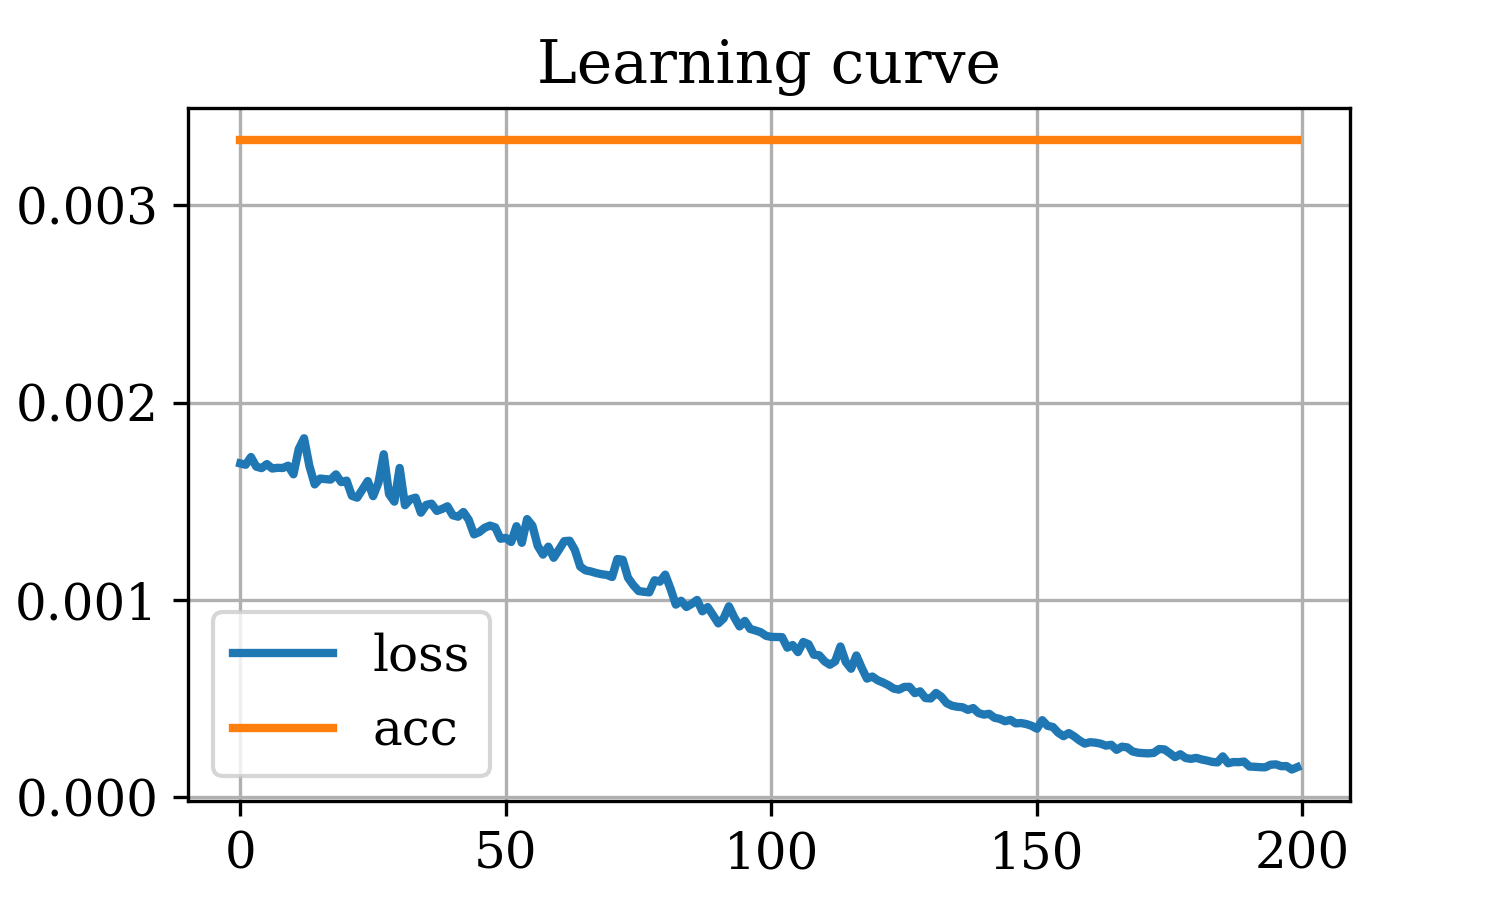

In [12]:
# plot learning curve
err = history.history['loss']
acc = history.history['accuracy']

fig, ax = plt.subplots()
ax.plot(err,label='loss',lw=2)
ax.plot(acc,label='acc',lw=2)

ax.set_title('Learning curve')
ax.legend()
plt.show()

## Check on new data

<IPython.core.display.Javascript object>


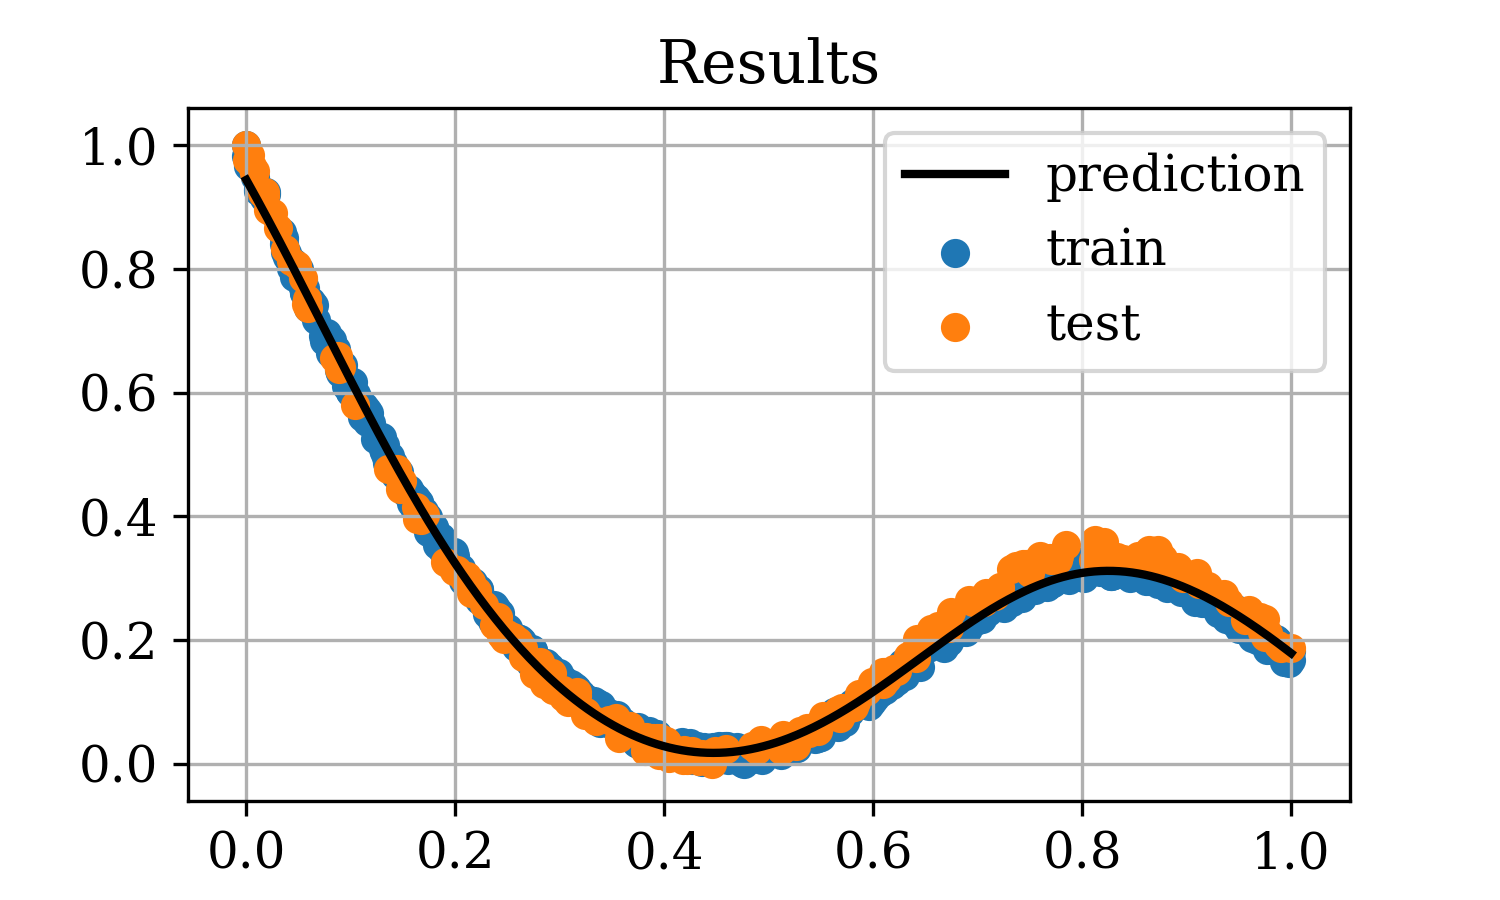

In [13]:
# Prediction over the whole domain
mx, Mx = np.min(IN_train), np.max(IN_train)
x_predict = np.linspace(mx, Mx,500)
x_predict = data.lineal_norm(x_predict)

y_predict = model.predict(x_predict)
#y_predict = data.lineal_norm(y_predict)   # should be unnecessary


fig, ax = plt.subplots()
ax.scatter(IN_train, OUT_train, label='train')
ax.scatter(IN_test,  OUT_test,label='test')
ax.plot(x_predict, y_predict,'k',lw=2, label='prediction')
ax.legend()
ax.set_title('Results')
plt.show()

In [ ]:
# # Save result
# model.save('my_first_NN.h5')